In [ ]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pylab as pyl
import keras
import tensorflow as tf

In [ ]:
#Check for GPU
tf.test.gpu_device_name()

''

In [ ]:
#Import Data
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
#Shape of first image
x_train[0].shape

(28, 28)

In [ ]:
#Reshape the images
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

In [ ]:
#For better precision convert x_train and x_test data type to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
#Scale down the input variables
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#Convert multi class vectors to binary class matrices
num_classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


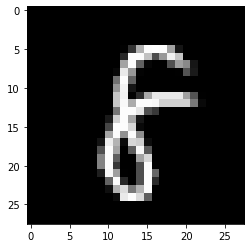

In [ ]:
#Visulaize a single label
print('Label:',y_train[456:457])
plt.imshow(x_train[456:457].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#Install Keras tuner
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=daec0ef67d4320b71f105ff1727c34174e62b02e8b91c720b0842fc030139d79
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=1757857e7b92fb0c9bcb1fbfcb6e0b917cf5c0a1ed06b14c7d670d7757ced624
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
#Import Keras tuner and define a function to choose optimum Hyperparameter
from kerastuner.tuners import RandomSearch

def hyper_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  for i in range(hp.Int('num_layers:',1,3)):
    model.add(tf.keras.layers.Dense(
        units = hp.Int('num_units_' + str(i), min_value=30,max_value=40, step = 2),
        activation = hp.Choice('activation_' + str(i), ['sigmoid','relu','tanh'])))
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


In [ ]:
tuner = RandomSearch(
    hyper_model,
    objective = 'val_accuracy',
    max_trials = 10,
    directory = 'digits3',
    project_name = 'digits_hp3')

In [ ]:
#Summary of the search space
tuner.search_space_summary()

In [ ]:
#Start the search for best hyper parameters
tuner.search(x_train,y_train,epochs=3,validation_split = 0.1)

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5329 - accuracy: 0.8736 - val_loss: 0.2134 - val_accuracy: 0.9388
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9356 - val_loss: 0.1565 - val_accuracy: 0.9565
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1713 - accuracy: 0.9487 - val_loss: 0.1357 - val_accuracy: 0.9590


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3525 - accuracy: 0.9008 - val_loss: 0.1601 - val_accuracy: 0.9548
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1830 - accuracy: 0.9469 - val_loss: 0.1546 - val_accuracy: 0.9572
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1438 - accuracy: 0.9579 - val_loss: 0.1180 - val_accuracy: 0.9667


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5467 - accuracy: 0.8700 - val_loss: 0.2274 - val_accuracy: 0.9385
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2289 - accuracy: 0.9330 - val_loss: 0.1671 - val_accuracy: 0.9508
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1787 - accuracy: 0.9477 - val_loss: 0.1426 - val_accuracy: 0.9593


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4340 - accuracy: 0.8842 - val_loss: 0.1913 - val_accuracy: 0.9463
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2104 - accuracy: 0.9373 - val_loss: 0.1492 - val_accuracy: 0.9578
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1674 - accuracy: 0.9496 - val_loss: 0.1293 - val_accuracy: 0.9642


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3493 - accuracy: 0.9030 - val_loss: 0.1675 - val_accuracy: 0.9522
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1774 - accuracy: 0.9478 - val_loss: 0.1324 - val_accuracy: 0.9632
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1372 - accuracy: 0.9593 - val_loss: 0.1118 - val_accuracy: 0.9683


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.9016 - val_loss: 0.1828 - val_accuracy: 0.9472
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1855 - accuracy: 0.9456 - val_loss: 0.1351 - val_accuracy: 0.9625
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1448 - accuracy: 0.9577 - val_loss: 0.1157 - val_accuracy: 0.9655


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4591 - accuracy: 0.8793 - val_loss: 0.2029 - val_accuracy: 0.9403
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2179 - accuracy: 0.9355 - val_loss: 0.1629 - val_accuracy: 0.9532
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1730 - accuracy: 0.9491 - val_loss: 0.1372 - val_accuracy: 0.9602


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4539 - accuracy: 0.8810 - val_loss: 0.1989 - val_accuracy: 0.9435
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2189 - accuracy: 0.9349 - val_loss: 0.1505 - val_accuracy: 0.9592
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1742 - accuracy: 0.9484 - val_loss: 0.1390 - val_accuracy: 0.9627


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5189 - accuracy: 0.8652 - val_loss: 0.2064 - val_accuracy: 0.9425
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2089 - accuracy: 0.9383 - val_loss: 0.1573 - val_accuracy: 0.9535
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1611 - accuracy: 0.9511 - val_loss: 0.1384 - val_accuracy: 0.9592


Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4840 - accuracy: 0.8718 - val_loss: 0.1965 - val_accuracy: 0.9418
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2023 - accuracy: 0.9403 - val_loss: 0.1492 - val_accuracy: 0.9563
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1608 - accuracy: 0.9534 - val_loss: 0.1360 - val_accuracy: 0.9597


INFO:tensorflow:Oracle triggered exit


In [ ]:
#The best model
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
#Summary of the best_model
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 38)                29830     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1170      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 31,310
Trainable params: 31,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner.results_summary()

Parameters for our model are
Hyperparameters:
1. Number of Layers to use: 2
2. Number of nodes in 1st layer: 38
3. Activation function in 1st layer: sigmoid
4. Number of nodes in 2nd layer: 38
5. Activation function in 2nd layer: tanh


# **Build the model**

In [ ]:

#Initialiae the network
model = tf.keras.Sequential()

#Add the input and hidden layers
model.add(tf.keras.layers.Dense(units = 38, activation = 'sigmoid', input_shape = (784,)))
model.add(tf.keras.layers.Dense(units = 38, activation = 'tanh'))

#Add the output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 38)                29830     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                1482      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                390       
Total params: 31,702
Trainable params: 31,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
#Training the model
model.fit(x_train,y_train, batch_size = 128, epochs=10, verbose = 1)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6241 - accuracy: 0.8542
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.9269
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9403
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1748 - accuracy: 0.9488
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1531 - accuracy: 0.9555
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1367 - accuracy: 0.9592
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1231 - accuracy: 0.9642
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9667
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9691
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9715

In [ ]:
#Testing the model
score =  model.evaluate(x_test,y_test, verbose = 1)
print('Test Loss:',score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 0s 904us/step - loss: 0.1201 - accuracy: 0.9635
Test Loss: 0.12012854963541031
Test Accuracy: 0.9635000228881836


In [ ]:
#Predict for a random single input
prediction = model.predict(x_test[104:105])
prediction = prediction[0]
print('Predicted Probability\n',prediction)
print('\nOutput\n',(prediction > 0.5)*1)

Predicted Probability
 [6.6440152e-05 2.9868486e-05 2.4143403e-04 6.3052442e-04 3.6913697e-03
 3.7705872e-02 1.3081925e-06 4.1942383e-04 7.5733165e-05 9.5713800e-01]

Output
 [0 0 0 0 0 0 0 0 0 1]


Model predicted x_test[104:105] as number 5.

Compare it with the actual image

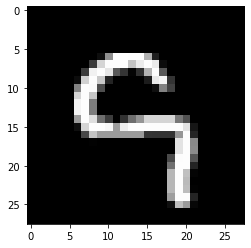

In [ ]:
plt.imshow(x_test[104:105].reshape(28,28), cmap = 'gray')
plt.show()

#Check the model with an image outside of the dataset

In [ ]:
#Load library
import cv2

In [ ]:
#Load the image
image = cv2.imread('6.jpg',cv2.IMREAD_COLOR)

In [ ]:
#Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

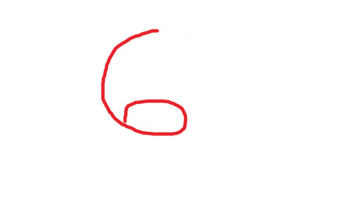

In [ ]:
#Show the image
plt.imshow(image_rgb), plt.axis('off')
plt.show()

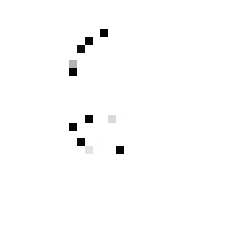

In [ ]:
#Load the image in grayscale and reshape it inorder to give it to the model
image_gray = cv2.imread('6.jpg',cv2.IMREAD_GRAYSCALE)
image_gray_reshape = cv2.resize(image_gray,(28,28))

#Show image
plt.imshow(image_gray_reshape, cmap = 'gray'), plt.axis('off')
plt.show()

In [ ]:
#Predict the new image
prediction = model.predict(image_gray_reshape.reshape(1,784))
prediction = prediction[0]
print('Predicted Probability\n',prediction)
print('\nPredicted Digit\n',(prediction > 0.5)*1)

Predicted Probability
 [4.6143658e-03 5.0349645e-05 2.6183045e-01 5.4753124e-04 3.4815665e-05
 5.8808731e-04 5.7585454e-01 1.6687997e-04 1.5631196e-01 1.0282088e-06]

Predicted Digit
 [0 0 0 0 0 0 1 0 0 0]


#Saving the Model Parameters for later use


In [ ]:
#Saving the model paramters as a json file
model_json = model.to_json()

#Add the file name of the model
with open('model.json','w') as json_file:
  json_file.write(model_json)  

#Save the weights and biases of the model into a HDF5 file
model.save_weights('model.h5')